In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif

In [2]:
from xgboost import XGBClassifier

## Признаки

In [3]:

cols = [
            #"result_game",
            "count_matches_team1", "count_matches_team2", "winrate_team1", "winrate_team2", "luse_rate_team1", "luse_rate_team2", "drow_rate_team1",
            "drow_rate_team2","total_avg_team1_in_match", "total_avg_team2_in_match", "total_avg_team1_toscore", "total_avg_team2_toscore",
            "total_avg_team1_missed", "total_avg_team2_missed", "total_score_team1", "total_score_team2", "total_missed_team1", "total_missed_team2",
            "ind_total_avg_corner_team1", "ind_total_avg_corner_team2", "ind_oponent_total_avg_corner_team1", "ind_oponent_total_avg_corner_team2",
            "total_avg_corner_team1", "total_avg_corner_team2", "yelow_cards_ind_total_avg_team1", "yelow_cards_ind_total_avg_team2",
            "yelow_cards_oponent_total_avg_team1", "yelow_cards_oponent_total_avg_team2", "yelow_cards_total_team1", "yelow_cards_total_team2",
            "red_cards_ind_oponent_total_avg_team1", "red_cards_ind_oponent_total_avg_team2", "red_cards_total_team1", "red_cards_total_team2",
            "ind_total_cick_in_gets_team1",
            "ind_total_cick_in_gets_team2",
            "ind_oponent_total_cick_in_gets_team1",
            "ind_oponent_total_cick_in_gets_team2",
            "total_cick_in_gets_team1",
            "total_cick_in_gets_team2",
            "foll_ind_total_team1",
            "foll_ind_total_team2",
            "foll_oponent_total_team1",
            "foll_oponent_total_team2",
            "foll_total_team1",
            "foll_total_team2",
            "ind_total_cick_team1",
            "ind_total_cick_team2",
            "ind_oponent_total_cick_team1",
            "ind_oponent_total_cick_team2",
            "total_cick_team1",
            "total_cick_team2",
            "ind_total_atacks_team1",
            "ind_total_atacks_team2",
            "ind_oponent_total_atacks_team1",
            "ind_oponent_total_atacks_team2",
            "total_atacks_team1",
            "total_atacks_team2",
            "total_dangerous_atacks_team1",
            "total_dangerous_atacks_team2",
            "ind_total_dangerous_atacks_team1",
            "ind_total_dangerous_atacks_team2",
            "ind_oponent_total_dangerous_atacks_team1",
            "ind_oponent_total_dangerous_atacks_team2",
            "ind_save_total_team1",
            "ind_save_total_team2",
            "ind_oponent_total_save_team1",
            "ind_oponent_total_save_team2",
            "save_total_in_match_team1",
            "save_total_in_match_team2",
            "ind_possession_time_team1",
            "ind_possession_time_team2",
            "ind_oponent_possession_time_team1",
            "ind_oponent_possession_time_team2",
            "count_collision",
            "win_in_collision_team1",
            "win_in_collision_team2",
        ]

## Обработка датасета

In [4]:
dataset1 = pd.read_csv('test-f.csv')
dataset1.head()

,result_game,count_matches_team1,count_matches_team2,winrate_team1,winrate_team2,luse_rate_team1,luse_rate_team2,drow_rate_team1,drow_rate_team2,total_avg_team1_in_match,...,ind_oponent_total_save_team2,save_total_in_match_team1,save_total_in_match_team2,ind_possession_time_team1,ind_possession_time_team2,ind_oponent_possession_time_team1,ind_oponent_possession_time_team2,count_collision,win_in_collision_team1,win_in_collision_team2
0,0,48,50,41.666667,48.0,18.75,16.0,39.583333,36.0,3.0,...,3.2,7.5,5.8,58,54,42,46,2,1,1
1,1,50,50,54.000000,32.0,16.00,32.0,30.000000,36.0,3.4,...,2.7,6.3,5.7,50,47,50,53,19,14,2
2,-1,50,50,38.000000,38.0,20.00,26.0,42.000000,36.0,3.0,...,3.3,6.9,7.5,48,53,52,47,16,3,11
3,0,50,50,24.000000,12.0,28.00,12.0,48.000000,76.0,2.3,...,2.8,6.1,6.4,42,48,58,52,2,2,0
4,-1,50,50,36.000000,24.0,24.00,30.0,40.000000,46.0,3.4,...,3.4,6.1,6.7,54,48,46,52,17,8,4


In [5]:
dataset2 = pd.read_csv('new_test_f.csv')
dataset2.head()

,result_game,count_matches_team1,count_matches_team2,winrate_team1,winrate_team2,luse_rate_team1,luse_rate_team2,drow_rate_team1,drow_rate_team2,total_avg_team1_in_match,...,ind_oponent_total_save_team2,save_total_in_match_team1,save_total_in_match_team2,ind_possession_time_team1,ind_possession_time_team2,ind_oponent_possession_time_team1,ind_oponent_possession_time_team2,count_collision,win_in_collision_team1,win_in_collision_team2
0,0,3,50,66.666667,34.0,33.333333,30.0,0.0,36.0,3.3,...,2.8,10.0,6.0,55,45,45,55,4,2,1
1,-1,50,50,18.000000,78.0,22.000000,16.0,60.0,6.0,2.8,...,0.0,0.0,0.0,46,56,54,44,10,3,5
2,1,50,50,36.000000,38.0,24.000000,26.0,40.0,36.0,2.4,...,2.6,5.6,7.3,44,47,56,53,4,3,1
3,-1,50,50,34.000000,36.0,30.000000,30.0,36.0,34.0,2.3,...,5.5,7.3,9.6,53,55,47,45,18,8,3
4,0,50,50,38.000000,30.0,26.000000,42.0,36.0,28.0,2.7,...,2.4,6.5,5.4,54,47,46,53,13,5,3


In [6]:
dataset = pd.concat([dataset1, dataset2], ignore_index=False)
print(f'Размер датасета: {dataset.shape}')
#Смотрим нулевые значения в столбцах
for i in dataset.columns:
    print(f'Столбец: {i}')
    print(f'Количество пропусков: {(dataset.loc[:, i] == 0).sum()}')
    print('-----------------------')

Размер датасета: (11587, 78)
Столбец: result_game
Количество пропусков: 2897
-----------------------
Столбец: count_matches_team1
Количество пропусков: 11
-----------------------
Столбец: count_matches_team2
Количество пропусков: 19
-----------------------
Столбец: winrate_team1
Количество пропусков: 39
-----------------------
Столбец: winrate_team2
Количество пропусков: 27
-----------------------
Столбец: luse_rate_team1
Количество пропусков: 42
-----------------------
Столбец: luse_rate_team2
Количество пропусков: 41
-----------------------
Столбец: drow_rate_team1
Количество пропусков: 18
-----------------------
Столбец: drow_rate_team2
Количество пропусков: 23
-----------------------
Столбец: total_avg_team1_in_match
Количество пропусков: 12
-----------------------
Столбец: total_avg_team2_in_match
Количество пропусков: 19
-----------------------
Столбец: total_avg_team1_toscore
Количество пропусков: 18
-----------------------
Столбец: total_avg_team2_toscore
Количество пропусков: 

In [7]:
#Удаление бесполезных признаков
del_cols = ["total_avg_corner_team1","total_avg_corner_team2","yelow_cards_ind_total_avg_team1","yelow_cards_ind_total_avg_team2",
            "yelow_cards_oponent_total_avg_team1","yelow_cards_oponent_total_avg_team2", "yelow_cards_total_team1","yelow_cards_total_team2",
           "red_cards_ind_oponent_total_avg_team1","red_cards_ind_oponent_total_avg_team2","red_cards_total_team1", "red_cards_total_team2",
           "foll_ind_total_team1", "foll_ind_total_team2","foll_oponent_total_team1","foll_oponent_total_team2","foll_total_team1","foll_total_team2",]
print(len(del_cols))
dataset = dataset.drop(del_cols, axis = 1)
dataset.shape

18


(11587, 60)

In [8]:
#Смортим соответсвие count_collision c win_in_collision_team1 и win_in_collision_team2
rows_collision = list((dataset[dataset['count_collision'] < dataset['win_in_collision_team1'] + dataset['win_in_collision_team1']]).index)

dataset = dataset.drop(rows_collision, axis = 0)
dataset.reset_index(drop=True, inplace=True)
print(dataset.shape)

(8362, 60)


In [9]:
dataset.head()

,result_game,count_matches_team1,count_matches_team2,winrate_team1,winrate_team2,luse_rate_team1,luse_rate_team2,drow_rate_team1,drow_rate_team2,total_avg_team1_in_match,...,ind_oponent_total_save_team2,save_total_in_match_team1,save_total_in_match_team2,ind_possession_time_team1,ind_possession_time_team2,ind_oponent_possession_time_team1,ind_oponent_possession_time_team2,count_collision,win_in_collision_team1,win_in_collision_team2
0,0,48,50,41.666667,48.0,18.75,16.0,39.583333,36.0,3.0,...,3.2,7.5,5.8,58,54,42,46,2,1,1
1,-1,50,50,36.000000,24.0,24.00,30.0,40.000000,46.0,3.4,...,3.4,6.1,6.7,54,48,46,52,17,8,4
2,-1,50,50,36.000000,32.0,18.00,22.0,46.000000,46.0,2.6,...,2.8,6.0,6.1,47,52,53,48,10,3,5
3,0,40,50,40.000000,34.0,27.50,18.0,32.500000,48.0,2.4,...,3.5,5.4,12.4,46,44,54,56,4,1,1
4,0,50,50,26.000000,36.0,26.00,16.0,48.000000,48.0,3.2,...,2.8,6.7,5.8,51,47,49,53,5,1,4


In [10]:
#Заменяем count_collision на drow_collision и вычисляем количество ничьих
dataset.rename(columns={'count_collision': 'drow_collision'}, inplace=True)
for index in range(len(dataset)):
    dataset.loc[index, 'drow_collision'] =  dataset.loc[index, 'drow_collision'] - dataset.loc[index, 'win_in_collision_team1'] - dataset.loc[index, 'win_in_collision_team2']

dataset.head()

,result_game,count_matches_team1,count_matches_team2,winrate_team1,winrate_team2,luse_rate_team1,luse_rate_team2,drow_rate_team1,drow_rate_team2,total_avg_team1_in_match,...,ind_oponent_total_save_team2,save_total_in_match_team1,save_total_in_match_team2,ind_possession_time_team1,ind_possession_time_team2,ind_oponent_possession_time_team1,ind_oponent_possession_time_team2,drow_collision,win_in_collision_team1,win_in_collision_team2
0,0,48,50,41.666667,48.0,18.75,16.0,39.583333,36.0,3.0,...,3.2,7.5,5.8,58,54,42,46,0,1,1
1,-1,50,50,36.000000,24.0,24.00,30.0,40.000000,46.0,3.4,...,3.4,6.1,6.7,54,48,46,52,5,8,4
2,-1,50,50,36.000000,32.0,18.00,22.0,46.000000,46.0,2.6,...,2.8,6.0,6.1,47,52,53,48,2,3,5
3,0,40,50,40.000000,34.0,27.50,18.0,32.500000,48.0,2.4,...,3.5,5.4,12.4,46,44,54,56,2,1,1
4,0,50,50,26.000000,36.0,26.00,16.0,48.000000,48.0,3.2,...,2.8,6.7,5.8,51,47,49,53,0,1,4


In [11]:
#Проверяем соответсвие count_matches_team1 и count_matches_team2 с drow_collision, win_in_collision_team1, win_in_collision_team2
rows_count = []
for index in range(len(dataset)):
    if dataset.loc[index, 'count_matches_team1'] < dataset.loc[index, 'drow_collision'] + dataset.loc[index, 'win_in_collision_team1'] + dataset.loc[index, 'win_in_collision_team2']:
        rows_count.append(index)
    if dataset.loc[index, 'count_matches_team2'] < dataset.loc[index, 'drow_collision'] + dataset.loc[index, 'win_in_collision_team1'] + dataset.loc[index, 'win_in_collision_team2']:
        rows_count.append(index)
    if dataset.loc[index, 'count_matches_team1'] == 0 or dataset.loc[index, 'count_matches_team2'] == 0:
        rows_count.append(index)
dataset = dataset.drop(rows_count, axis = 0)


In [12]:
excep_cols= ['drow_collision', 'win_in_collision_team1', 'win_in_collision_team2', 'result_game']
del_rows = []
for i in dataset.columns:
    if i not in excep_cols:
        count = (dataset.loc[:, i] == 0).sum()
        if count > 500:
            for j in dataset[dataset[i] == 0].index:
             del_rows.append(j)
del_rows = list(set(del_rows))

In [13]:
dataset = dataset.drop(del_rows, axis = 0)

## Оценка признаков и разделение датасета

In [14]:
X = dataset[dataset.columns[1:].values]
y = dataset[dataset.columns[:1].values]

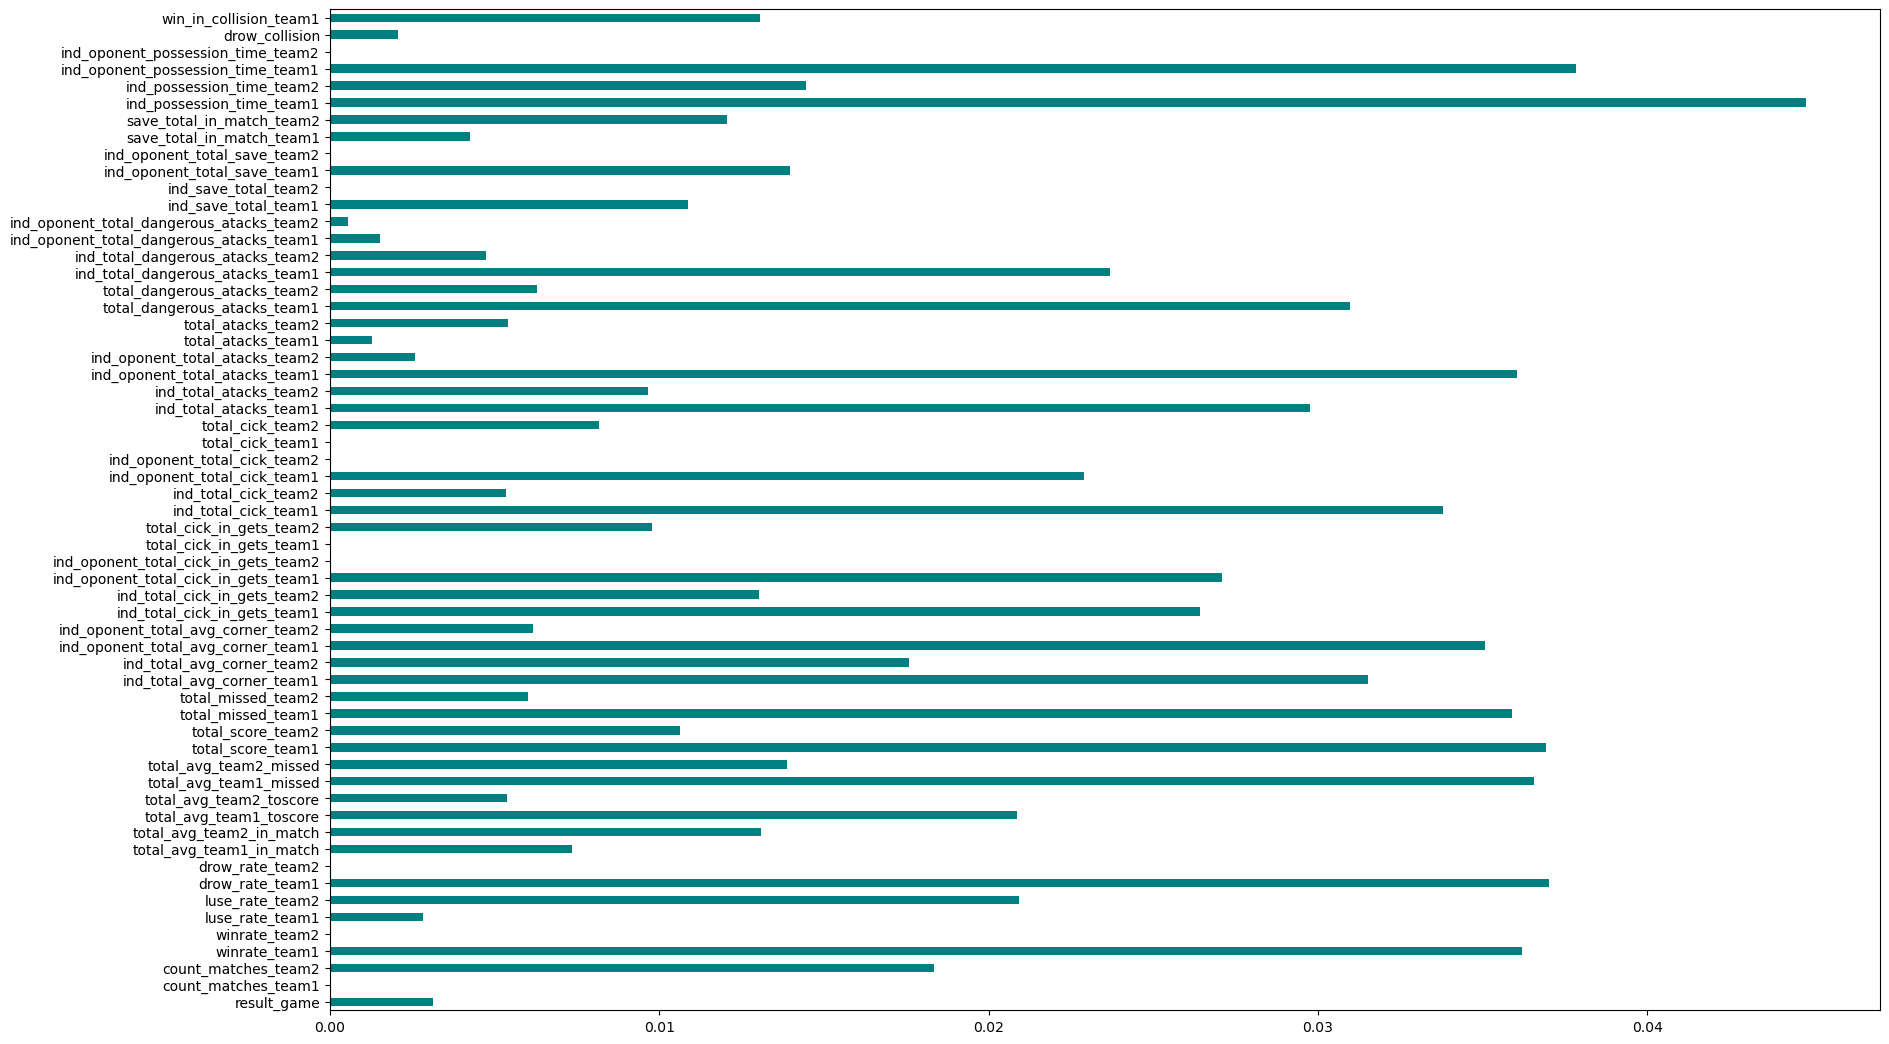

In [15]:
#Сбор информации
importances = mutual_info_classif(X, y.values.ravel(), n_neighbors=5)
plt.figure(figsize=(20,13))
feature_importances = pd.Series(importances, dataset.columns[0:len(dataset.columns)-1])
feature_importances.plot(kind='barh', color='teal')
plt.show()

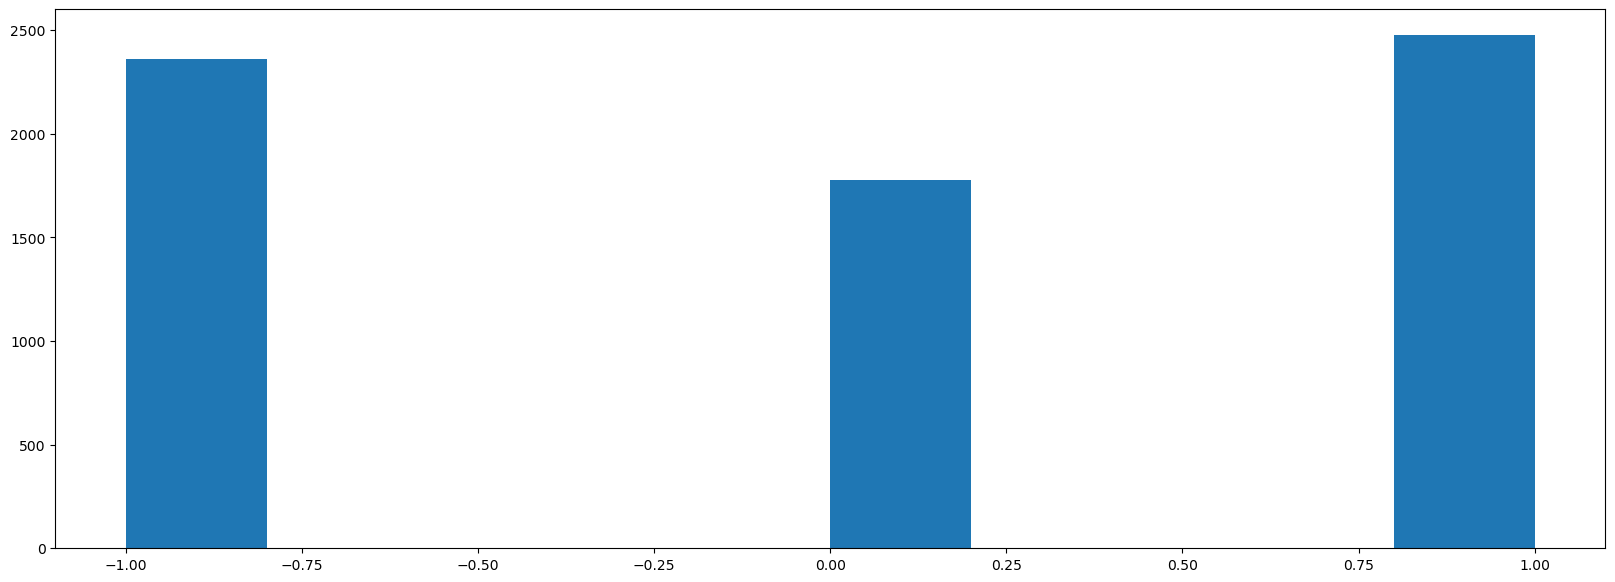

In [16]:
plt.figure(figsize=(20,7))
plt.hist(dataset[dataset.columns[0]].values)
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

## Первая модель: Случайый лес с GridSearchCV

In [21]:
vector_y = y_test['result_game'].reset_index(drop=True)

model_forest = RandomForestClassifier(random_state=42)

param_dist = {'n_estimators': [50, 80, 110, 150, 170, 190, 210], 
               'max_features': ['log2', 'sqrt'],
               'max_depth': [2, 4, 5, 6, 7],
               'min_samples_split': [2, 7, 18, 25, 35, 50],
               'min_samples_leaf': [2, 5, 14, 25, 34, 45],
               'bootstrap': [True, False]
             }
print(f'Подбираемые параметры: {param_dist}')
grid_model_forest = GridSearchCV(estimator = model_forest,
                    param_grid = param_dist,
                    scoring='f1_macro',
                    cv=5, 
                    verbose = 3,
                    n_jobs=5,
                   )       

Подбираемые параметры: {'n_estimators': [50, 80, 110, 150, 170, 190, 210], 'max_features': ['log2', 'sqrt'], 'max_depth': [2, 4, 5, 6, 7], 'min_samples_split': [2, 7, 18, 25, 35, 50], 'min_samples_leaf': [2, 5, 14, 25, 34, 45], 'bootstrap': [True, False]}


In [22]:
start = time.time()
grid_model_forest.fit(X_train, y_train.values.ravel())
end = time.time()

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


In [23]:
#Сведения об обучении
print(f"Время обучения: {end - start}")
print("Лучшие парметры случайного леса")
print(grid_model_forest.best_params_)
class_labels = grid_model_forest.classes_
print(f"Классы предсказаний: {class_labels}")
print('---------------')

#Оценка качества
y_pred_forest = grid_model_forest.predict(X_test)
print('F1-macro: ', f1_score(y_test, y_pred_forest, average='macro'))
print('Accuracy: ',accuracy_score(y_test, y_pred_forest))
print('Оценка качества по классам')
for target_class in [-1,0,1]:
    binary_predictions = []
    for ans in range(len(vector_y)):
        if vector_y[ans] == target_class:
            binary_predictions.append(1 if y_pred_forest[ans] == vector_y[ans] else 0)
    accuracy = accuracy_score(binary_predictions, [1]*len(binary_predictions))
    print(f"Точность определения класса {target_class}: {accuracy}")

Время обучения: 3980.6108067035675
Лучшие парметры случайного леса
{'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 50}
Классы предсказаний: [-1  0  1]
---------------
F1-macro:  0.39424686700855077
Accuracy:  0.4819056344480073
Оценка качества по классам
Точность определения класса -1: 0.5684340320591862
Точность определения класса 0: 0.040336134453781515
Точность определения класса 1: 0.7297297297297297


## Вторая модель: Градиентный бустинг с GridSearchCV

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgboost = le.fit_transform(y_train.values.ravel())

In [26]:
model_xgboost = XGBClassifier(
    objective= 'multi:softmax',
    nthread=3,
    seed = 42
)
parameters_xgboost = {
    'max_depth': range (2, 9, 1),
    'n_estimators': range(60, 180, 40),
    'learning_rate': [0.1, 0.05, 0.055],
    'reg_lambda' : [1,2,3,4],
    'reg_alpha' : [1,2,3,4]
}
grid_search_xgboost = GridSearchCV(
    estimator=model_xgboost,
    param_grid=parameters_xgboost,
    scoring = 'f1_macro',
    n_jobs = 3,
    cv = 10,
    verbose=3
)

In [27]:
start = time.time() 
grid_search_xgboost.fit(X_train, y_train_xgboost)
end = time.time()


Fitting 10 folds for each of 1008 candidates, totalling 10080 fits


In [28]:
#Сведения об обучении
print(f"Время обучения: {end-start}")
print("Лучшие параметры модели: ")
print(grid_search_xgboost.best_params_)

#Оценка качества
y_pred_xgboost = grid_search_xgboost.predict(X_test)
for i in range(len(y_pred_xgboost)):
    y_pred_xgboost[i]-=1
print('---------------')
print('F1-macro: ',f1_score(y_test, y_pred_xgboost, average='macro'))
print('Accuracy: ',accuracy_score(y_test, y_pred_xgboost))
print('Оценка качества по классам')
for target_class in [-1,0,1]:
    binary_predictions = []
    for ans in range(len(vector_y)):
        if vector_y[ans] == target_class:
            binary_predictions.append(1 if y_pred_xgboost[ans] == vector_y[ans] else 0)
    accuracy = accuracy_score(binary_predictions, [1]*len(binary_predictions))
    print(f"Точность определения класса {target_class}: {accuracy}")

Время обучения: 5609.770659685135
Лучшие параметры модели: 
{'learning_rate': 0.055, 'max_depth': 8, 'n_estimators': 100, 'reg_alpha': 4, 'reg_lambda': 3}
---------------
F1-macro:  0.4154335789020655
Accuracy:  0.4667888227210261
Оценка качества по классам
Точность определения класса -1: 0.5647348951911221
Точность определения класса 0: 0.11932773109243698
Точность определения класса 1: 0.6306306306306306


In [29]:
#Получим значимость признаков
weights = pd.DataFrame({'column': X_train.columns,
                        'weight': grid_search_xgboost.best_estimator_.feature_importances_})
weights.sort_values(by='weight', ascending=False).head(70)

,column,weight
55,ind_oponent_possession_time_team2,0.197584
3,winrate_team2,0.045084
13,total_avg_team2_missed,0.028701
14,total_score_team1,0.020311
53,ind_possession_time_team2,0.019909
15,total_score_team2,0.019779
57,win_in_collision_team1,0.019104
22,ind_total_cick_in_gets_team1,0.017871
25,ind_oponent_total_cick_in_gets_team2,0.016472
28,ind_total_cick_team1,0.015861


In [103]:
print(y_pred_xgboost)
y_test.head()

[-1 -1  1  1  1  1  0  0  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1
 -1  1 -1  0  1  1 -1  0  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1  0
  1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  0  1 -1 -1  1  1 -1  1
 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1  0  1 -1 -1
 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1  0 -1  0  1  1 -1  0 -1
  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  0  0 -1 -1  1 -1  1  1  0
 -1  1  1  1 -1 -1  1  1  1  0 -1  1 -1  1  0 -1  1 -1  1  1 -1  1  1  1
  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1  0  1  1 -1  1  1  1  1  1  1
  1 -1 -1  1  0 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1
 -1 -1  1  1  1 -1 -1  1  0 -1  1 -1 -1  1  1  1 -1  1  0 -1  1  1 -1  1
 -1 -1  1 -1 -1  0  1  1  1 -1  1 -1  1 -1  0  1 -1  1  1  1  1  1 -1  1
 -1  1  1  1  1 -1 -1  0  1  1  1  1 -1  1  1  0 -1  1  1  1 -1  1  1  1
 -1  1  1 -1  0 -1 -1  1 -1  0 -1 -1 -1 -1  1  1  1

,result_game
724,0
812,-1
1466,1
1469,1
51,1


In [104]:
feature_importance = grid_search_xgboost.best_estimator_.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

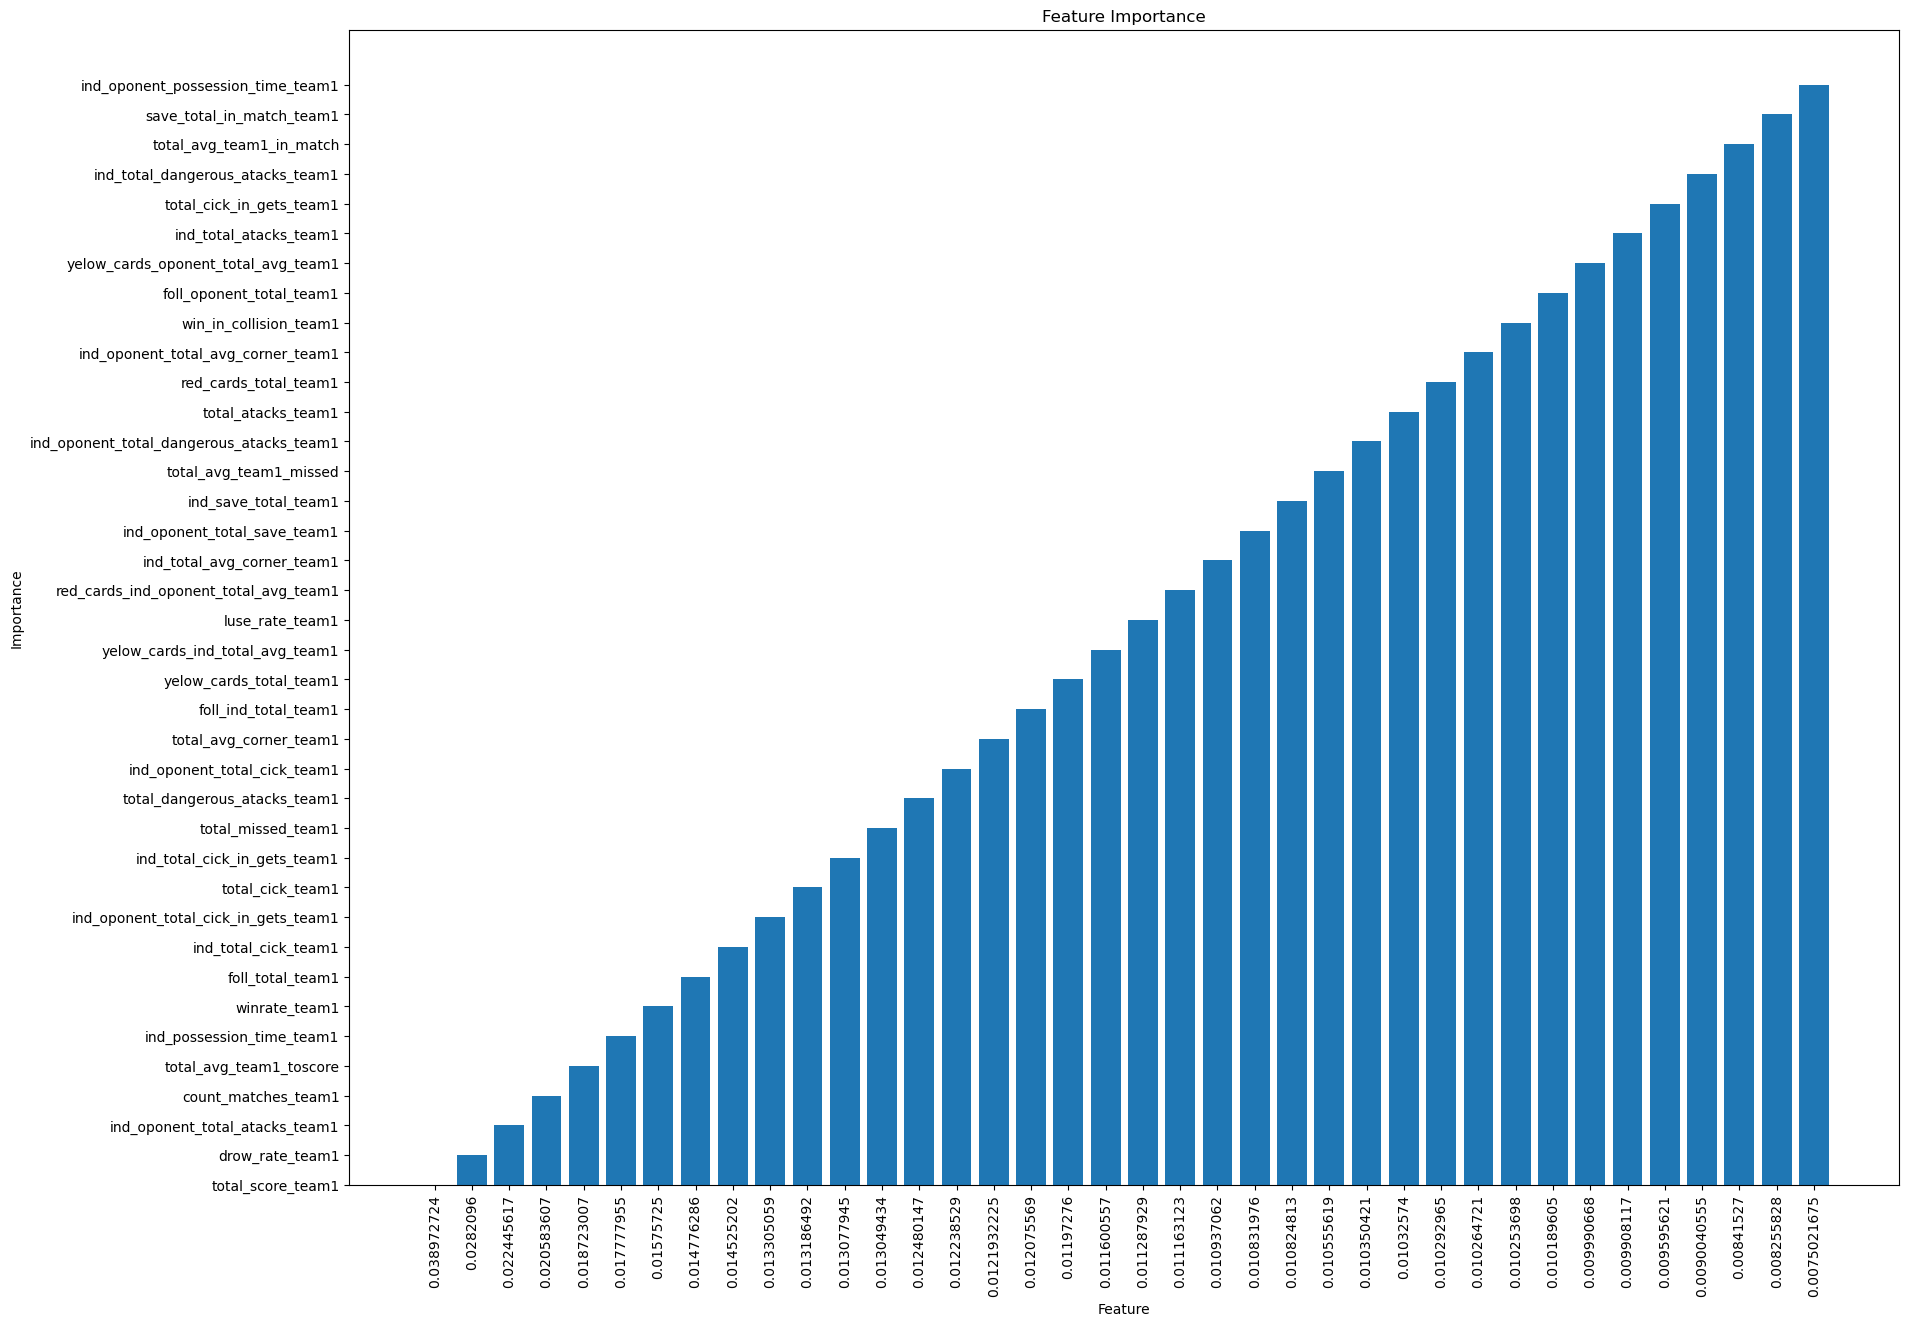

In [105]:
sorted_feature_names = feature_importance[sorted_idx]
sorted_feature_importance = X_train.columns[sorted_idx]

sorted_feature_importance1 =[]
sorted_feature_importance2 = []
sorted_feature_names1 = []
sorted_feature_names2 = []
for i in range(len(sorted_feature_importance)):
    if '1' in sorted_feature_importance[i]:
        sorted_feature_importance1.append(sorted_feature_importance[i])
        sorted_feature_names1.append(sorted_feature_names[i])
    if '2' in sorted_feature_importance[i]:
        sorted_feature_importance2.append(sorted_feature_importance[i])
        sorted_feature_names2.append(sorted_feature_names[i])


plt.figure(figsize=(20, 15))
plt.bar(range(len(sorted_feature_importance1)), sorted_feature_importance1, align="center")
plt.xticks(range(len(sorted_feature_importance1)), sorted_feature_names1, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

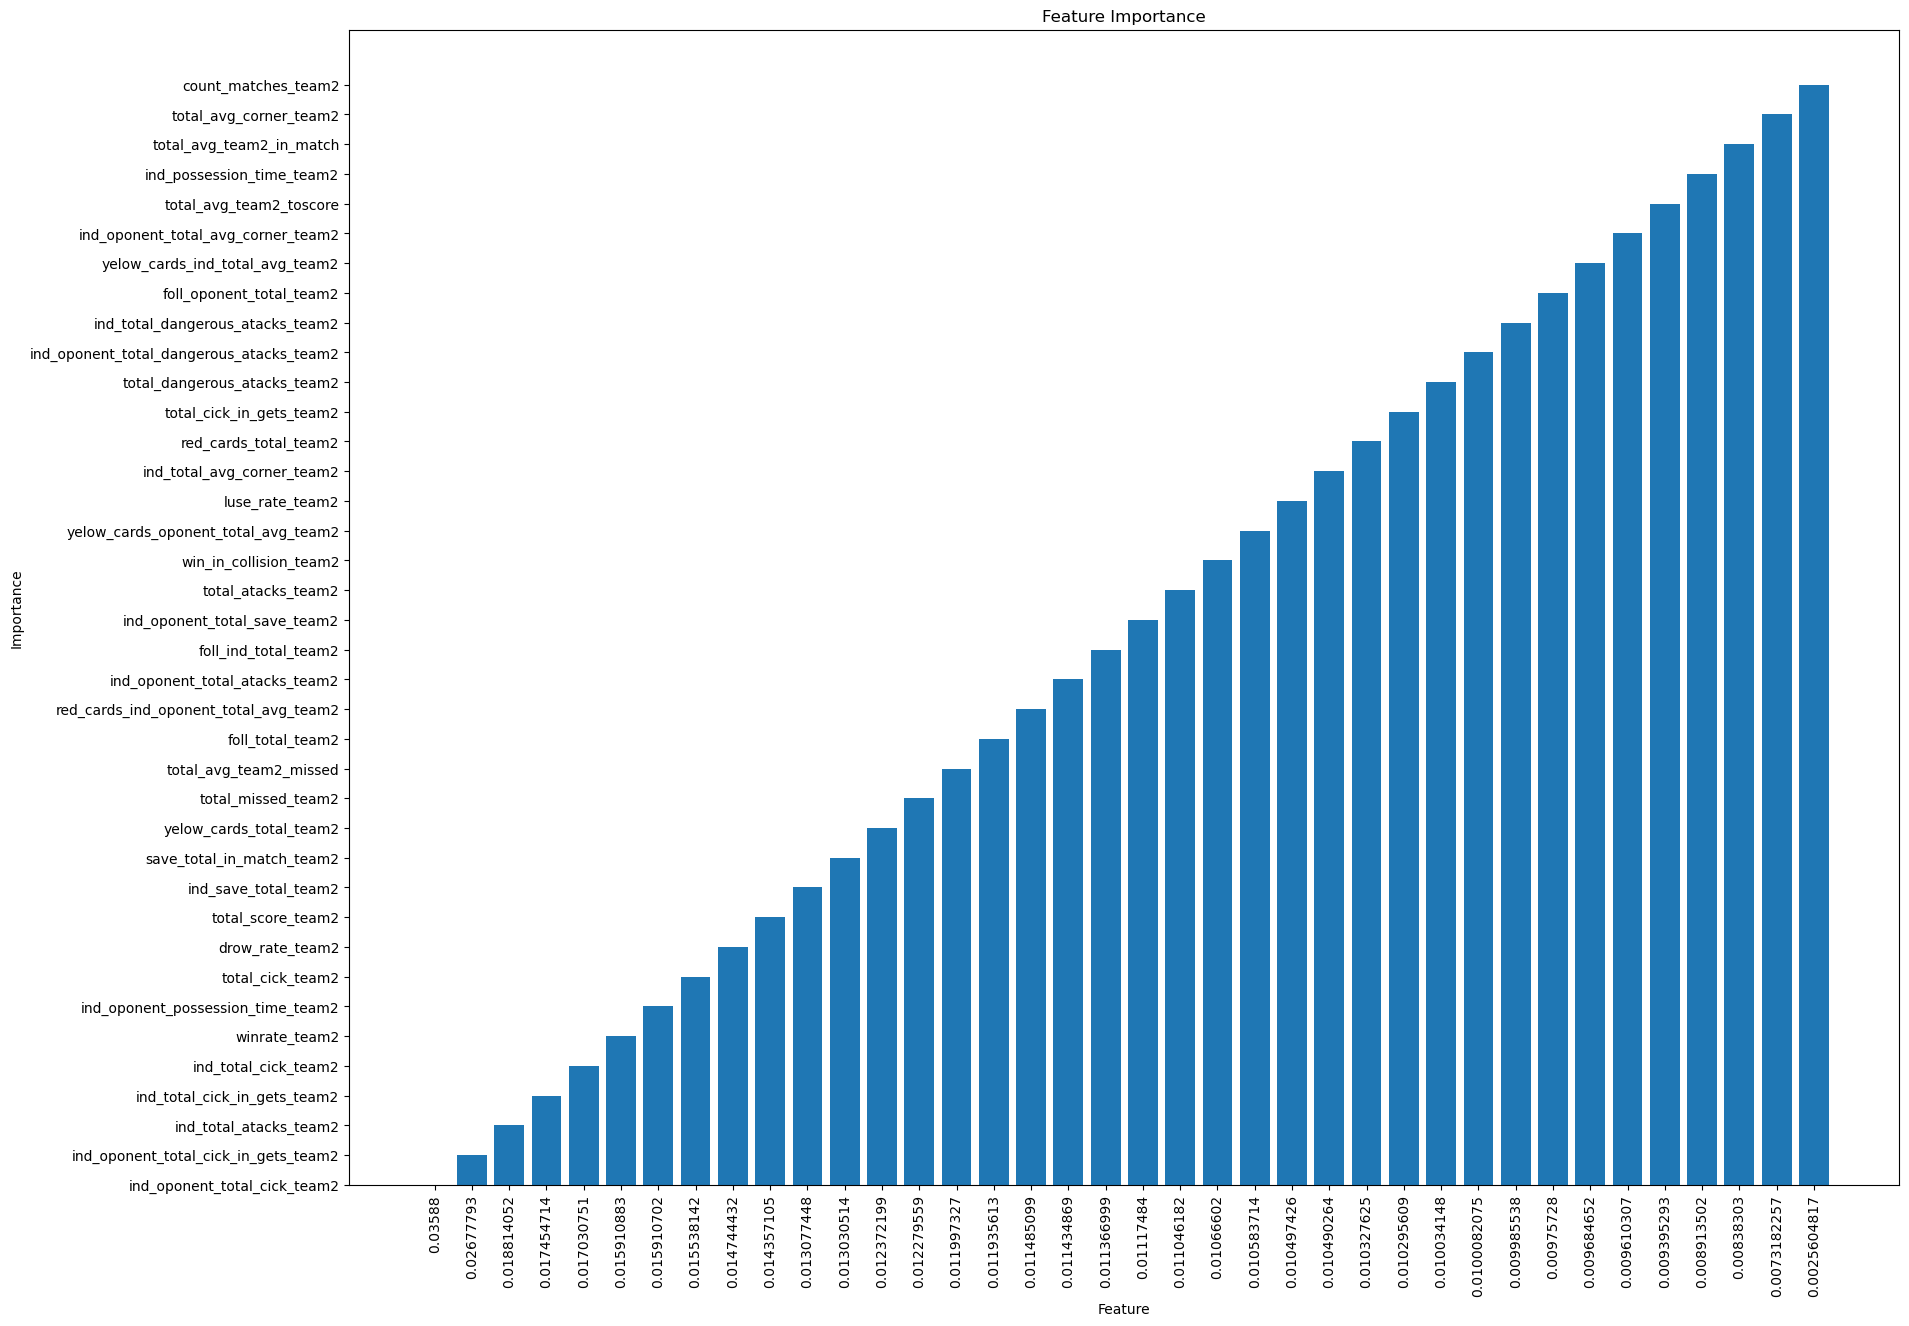

In [106]:
plt.figure(figsize=(20, 15))
plt.bar(range(len(sorted_feature_importance2)), sorted_feature_importance2, align="center")
plt.xticks(range(len(sorted_feature_importance2)), sorted_feature_names2, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()